In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import PyOctaveBand.PyOctaveBand as PyOctaveBand
import pandas as pd

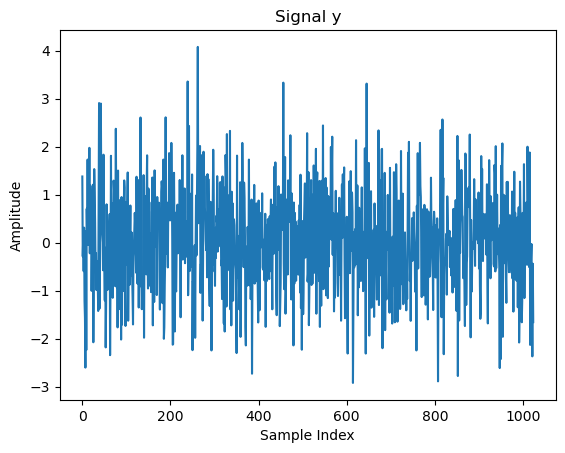

In [ ]:
fs = 16000
y = pd.read_csv("temp_file.csv", header=None)
y = y.to_numpy().squeeze()
y = y[0]

plt.plot(y)
plt.title("Signal y")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

*********
Low sampling rate, frequencies above fs/2 will be removed
*********


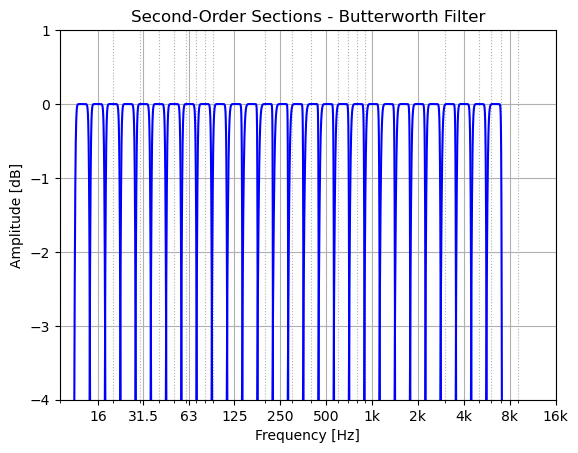

In [3]:
spl, freq, xb = PyOctaveBand.octavefilter(y, fs=fs, fraction=3, order=6, limits=[12, 20000], show=1, sigbands=1)

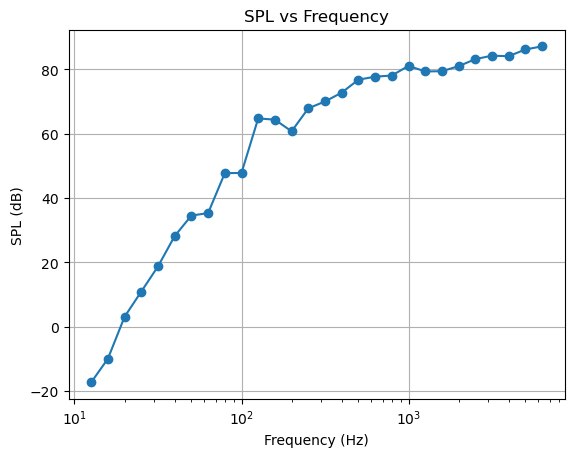

In [4]:
plt.plot(freq, spl, marker='o')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SPL (dB)')
plt.title('SPL vs Frequency')
plt.xscale('log')
plt.grid(True)
plt.show()

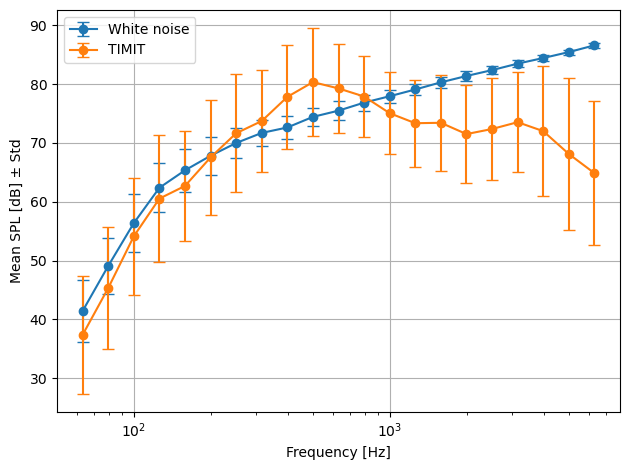

In [2]:
fs = 16000

for i in range(100):
    arr = np.random.randint(0, 10)
    sig = np.random.randint(0, 20)
    doa = np.random.randint(0, 50)

    y = pd.read_csv(f"../data/signals/signals_{arr}_{sig}_{doa}.csv", header=None)
    y = y.to_numpy().squeeze()
    y = y[0]
    spl, freq, xb = PyOctaveBand.octavefilter(y, fs=fs, fraction=3, order=6, limits=[63, 8000], show=0, sigbands=1)

    # Collect SPL for each frequency band
    if i == 0:
        spl_all = []
        for _ in range(len(freq)):
            spl_all.append([])

    for idx, val in enumerate(spl):
        spl_all[idx].append(val)

# After the loop, compute mean and std for each frequency band
spl_mean = [np.mean(vals) for vals in spl_all]
spl_std = [np.std(vals) for vals in spl_all]
plt.errorbar(freq, spl_mean, yerr=spl_std, marker='o', capsize=4, label='White noise')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Mean SPL [dB] ± Std')
plt.xscale('log')
plt.grid(True)

for i in range(100):
    arr = np.random.randint(0, 5)
    sig = np.random.randint(0, 20)
    doa = np.random.randint(0, 50)

    y = pd.read_csv(f"../data/validation/signals/signals_{arr}_{sig}_{doa}.csv", header=None)
    y = y.to_numpy().squeeze()
    y = y[0]
    spl, freq, xb = PyOctaveBand.octavefilter(y, fs=fs, fraction=3, order=6, limits=[63, 8000], show=0, sigbands=1)

    # Collect SPL for each frequency band
    if i == 0:
        spl_all = []
        for _ in range(len(freq)):
            spl_all.append([])

    for idx, val in enumerate(spl):
        spl_all[idx].append(val)

# After the loop, compute mean and std for each frequency band
spl_mean = [np.mean(vals) for vals in spl_all]
spl_std = [np.std(vals) for vals in spl_all]

plt.errorbar(freq, spl_mean, yerr=spl_std, marker='o', capsize=4, label='TIMIT')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Mean SPL [dB] ± Std')
plt.xscale('log')
plt.grid(True)
plt.legend(['White noise', 'TIMIT'])
plt.tight_layout()
plt.show()
